# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:** Mazunki Hoksaas

**Username:** rolfvh

# Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [2]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)

    return A - np.mean(A, axis=0)  # axis=0 implies we want the mean of each column

Test your function checking the following assertion on *testcase*:

In [3]:
print("Testing...")
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)
print("Everything is okay :)")

Testing...
Everything is okay :)


### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [4]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    N, M = A.shape
    
    return (A.T @ A) / (N-1)

Test your function checking the following assertion on *testcase*:

In [5]:
print("Testing...")
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)
print("Let's goooo~ :D")

Testing...
Let's goooo~ :D


### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit length!

In [6]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [7]:
print("\u2014 Testing...")
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)
print("\u2014 You are amazing!")

— Testing...
— You are amazing!


### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [8]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    indices = np.argsort(eigval)[::-1]  # we want to reverse the list because normally it's incrementing, but we want biggest first
    
    # using slices to resort lists is honestly peak numpy feature
    sorted_eigval = eigval[indices]
    sorted_eigvec = eigvec[:, indices]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [9]:
print("\u2014 This next test involves emancipation grills. Remember? I told you about them in the last test area, that did not have one...")
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)
print("\u2014 Not bad. I forgot how good you are at this. You should pace yourself, though. We have A LOT of tests to do.")

— This next test involves emancipation grills. Remember? I told you about them in the last test area, that did not have one...
— Not bad. I forgot how good you are at this. You should pace yourself, though. We have A LOT of tests to do.


### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [10]:
def calculate_pca_eigvec(A, m):
    centered = center_data(A)
    
    eigval, eigvec = compute_eigenvalue_eigenvectors(
        compute_covariance_matrix(centered)
    )
    
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    pca_eigvec = sorted_eigvec[:, :m]  # first 0..m-1 columns
    
    return pca_eigvec

def pca(A, m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    pca_eigvec = calculate_pca_eigvec(A, m)
    P = center_data(A) @ pca_eigvec  # why are we recreating the data here, it feels kind of silly...
    
    return pca_eigvec, P

Test your function checking the following assertion on *testcase*:

In [11]:
print("\u2014 The cold atmosphere of a new land...")
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)
print("\u2014 It fills you with determination!!")

— The cold atmosphere of a new land...
— It fills you with determination!!


## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [12]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

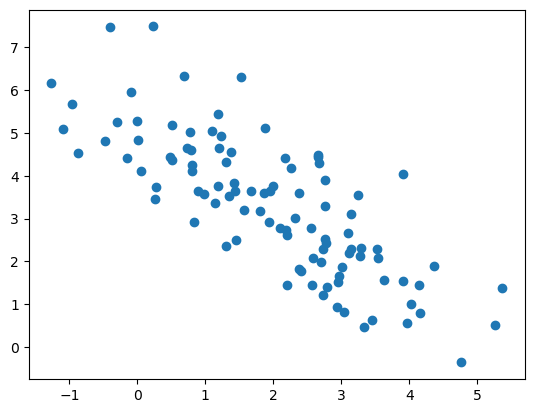

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

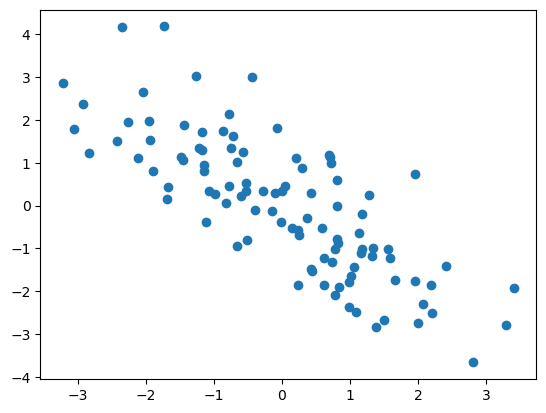

In [14]:
X_centered = center_data(X)
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.show()

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

In [15]:
def growth_rate(eigvec):
    return eigvec[1]/eigvec[0]

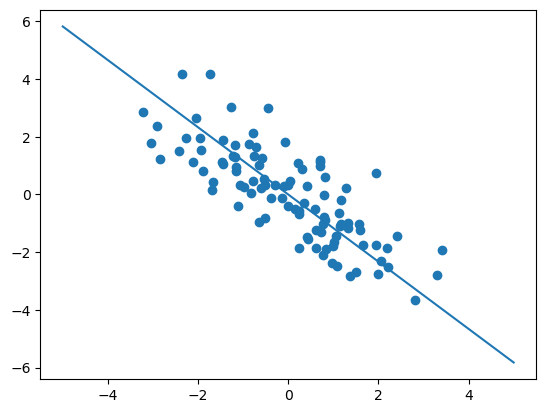

In [16]:
pca_eigvec = calculate_pca_eigvec(X_centered, 1)
first_eigvec = pca_eigvec[:, 0]

plt.scatter(X_centered[:,0],X_centered[:,1])  # original data

x = np.linspace(-5, 5, 1000)
y = growth_rate(first_eigvec) * x
plt.plot(x,y)
plt.show()

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

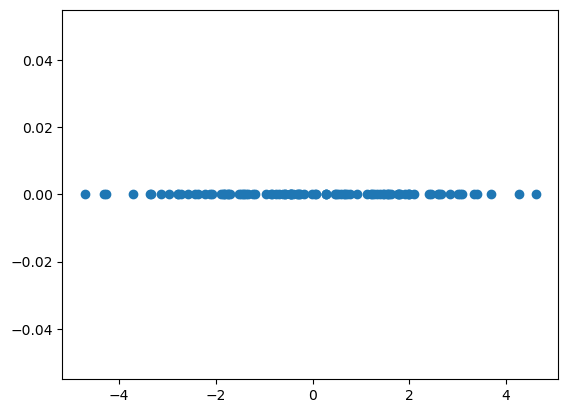

In [17]:
pca_eigvec = calculate_pca_eigvec(X_centered, 1)
P = X_centered @ pca_eigvec

plt.scatter(P[:, 0], np.zeros_like(P[:, 0]))
plt.show()

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [18]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

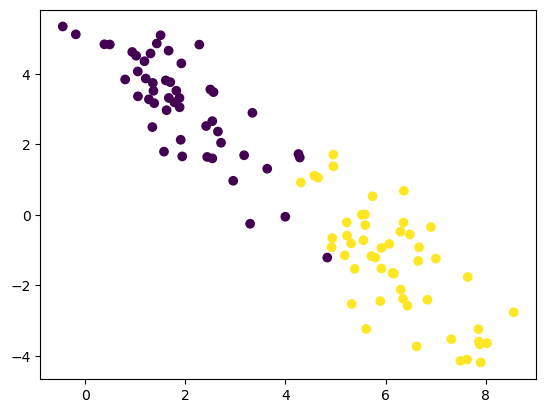

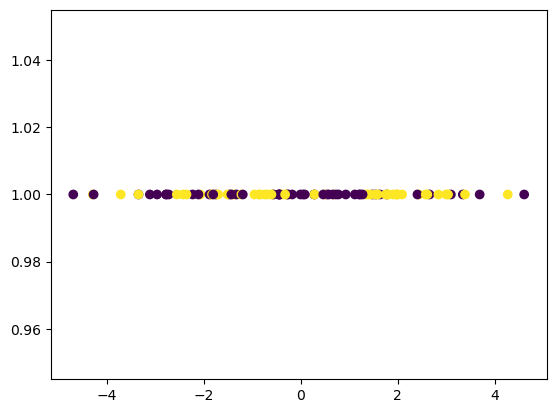

In [19]:
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.figure()  # original data

pca_eigvec = calculate_pca_eigvec(X, 1)
P = X_centered @ pca_eigvec

plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])
plt.show()

**ANSWER: We can see that after observing our data over the regression line, our data is fairly separable down the middle, although there is some overlap.**

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [20]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

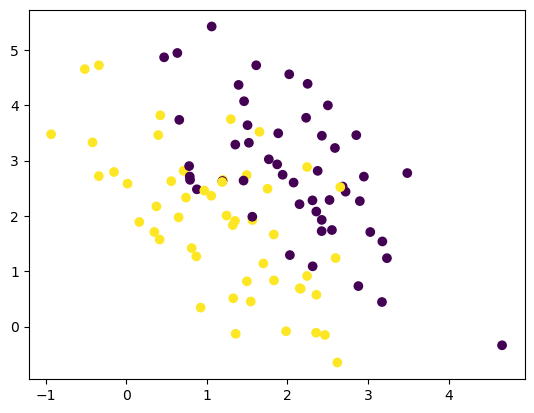

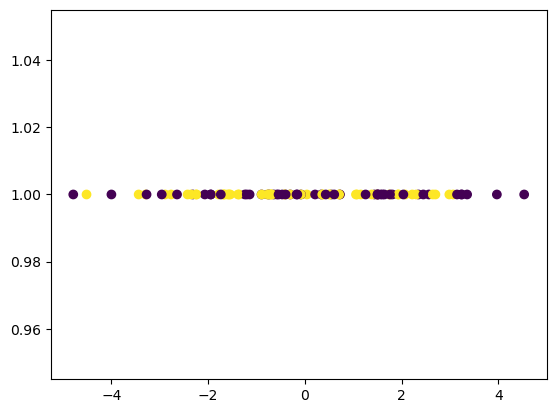

In [21]:
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.figure()  # original data

pca_eigvec = calculate_pca_eigvec(X, 1)
P = X_centered @ pca_eigvec

plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])
plt.show()

**ANSWER: The first eigenvector provides absolutely no clear cut between the yellow and purple points of our data.**

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

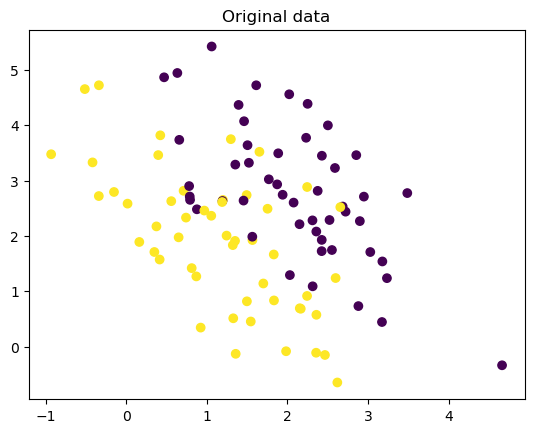

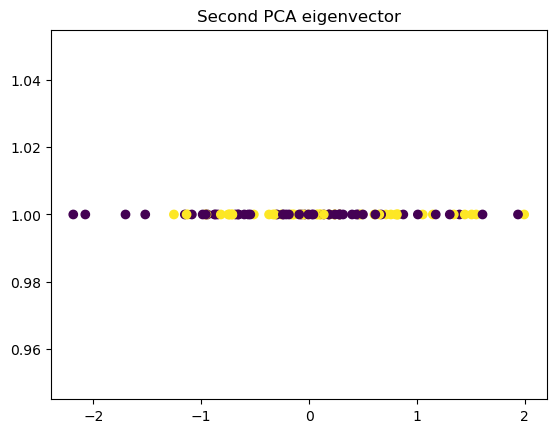

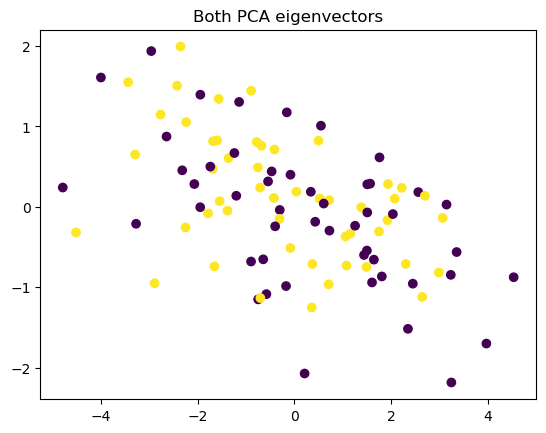

In [22]:
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.title("Original data")
plt.figure()

pca_eigvec = calculate_pca_eigvec(X, 2)
P_second = X_centered @ pca_eigvec[:,1].reshape(-1, 1)

plt.scatter(P_second[:,0],np.ones(P_second.shape[0]),c=y[:,0])
plt.title("Second PCA eigenvector")
plt.figure()

P = (X_centered @ pca_eigvec)

plt.scatter(P[:, 0], P[:, 1], c=y[:,0])
plt.title("Both PCA eigenvectors")
plt.show()

**ANSWER: That's slightly more helpful, we can see yellow points have a bias towards the left, and the purple points have a bias towards the right... but there is no clear cut here as we had in our other dataset.**

**When we recreate our original dataset, as we do when we use both our eigenvectors, we don't see the same results as in the first plot. The reason for this is the change in our coordinate system. We could amend this by offsetting our data by the mean, re-scaling the data, and rotating it back to the non-regressive coordinate system.**

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [23]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

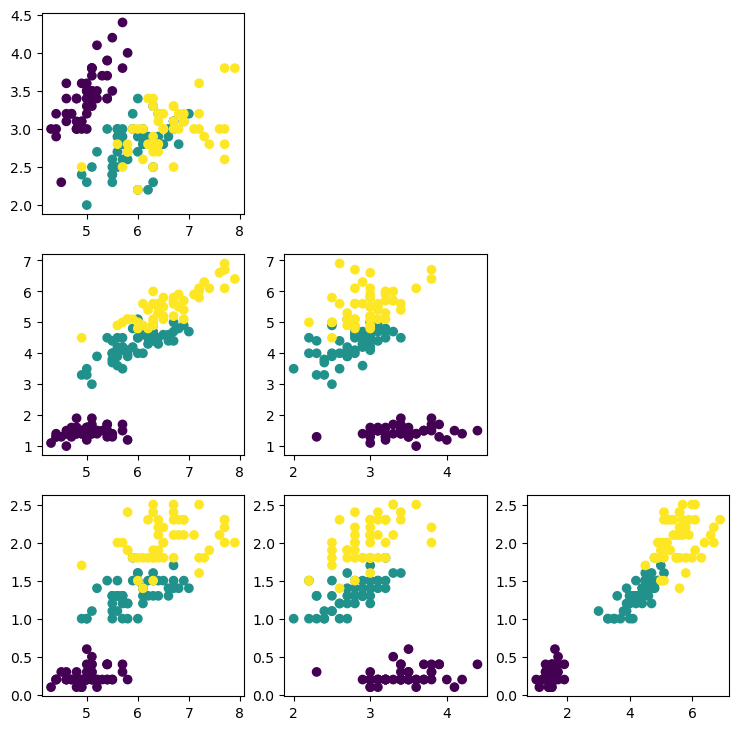

In [24]:
import itertools
feature_combinations = itertools.combinations(range(X.shape[1]), 2)  # picking all combinations instead of only two because why not
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for feature1, feature2 in feature_combinations:
    ax = axes[feature2, feature1]
    ax.scatter(X[:, feature1], X[:, feature2], c=y, cmap='viridis')

# no need to plot empty grids
for i in range(4):
    for j in range(i+1, 4):
        fig.delaxes(axes[i, j])  # cleaning up the mirrored sides
    fig.delaxes(axes[i, i])  # just cleaning up the diagonal

plt.show()

### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

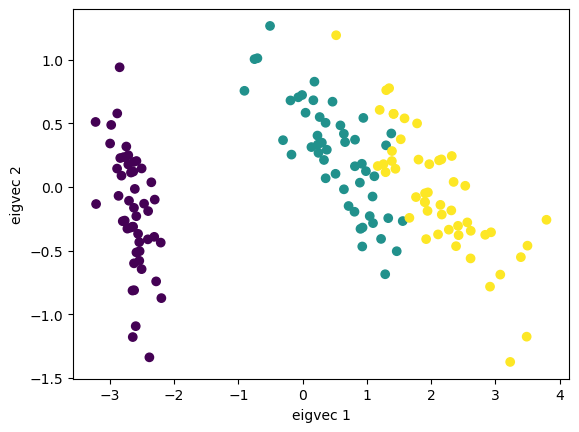

In [25]:
X_centered = center_data(X)
pca_eigvec = calculate_pca_eigvec(X, 2)  # 2 dimensions because sadly because my monitor is just a 2D surface :(
X_regenerated = X_centered @ pca_eigvec

plt.figure()
plt.scatter(X_regenerated[:, 0], X_regenerated[:, 1], c=y, cmap='viridis')
plt.xlabel("eigvec 1")
plt.ylabel("eigvec 2")
plt.show()



**ANSWER: When we picked two random dimensions, the data is very cluttered, and everything just looks like blobs of ink splattered on the surface. When we modify the coordinate system to our benefit, we can see each type of flower in different colours, with their variance maximised. Unpacking the datapoints like this makes it easier to observe trends in our data.**

**We can see the purple flower is fairly vertical, while both the green and yellow flowers decline over the second principal component as the first component grows. We don't know exactly what properties are used in each component, but I would guess it's showing a relationship between the petal size and the flower's sepal size.**

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [26]:
X, y, h, w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

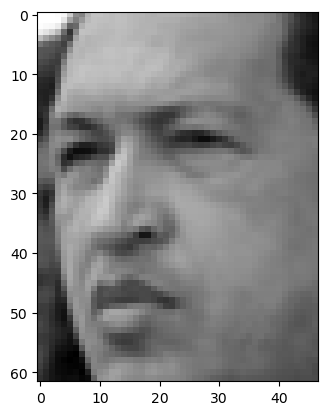

In [27]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [28]:
def encode_decode_pca(A, m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    
    # encode
    A_centered = center_data(A)
    pca_eigvec = calculate_pca_eigvec(A, m)
    
    P = A_centered @ pca_eigvec[:,:m]
    
    # decode
    return (P @ pca_eigvec[:,:m].T) + np.mean(A, axis=0)
    

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [29]:
Xhat = encode_decode_pca(X, 1)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

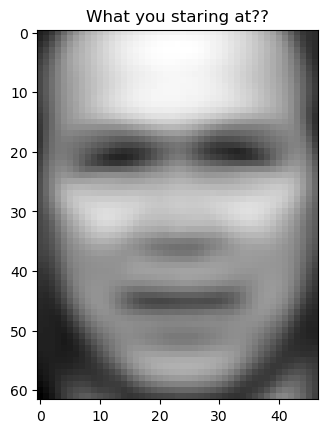

In [30]:
plt.title("What you staring at??")
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

**ANSWER: That's more cursed than a swarm of moths in my box of cereals. It looks like Voldemort himself. That aside, we can observe the main features even with one principal component: the eyes are well-positioned, and the mouth is at a given location, but we lost a lot of details. It's like a clay form for our creature.**

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

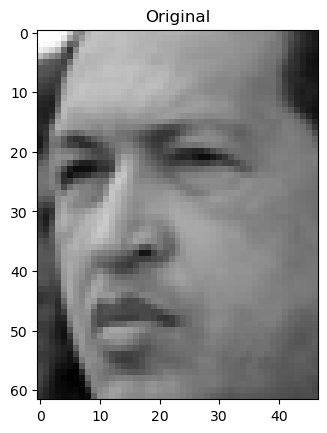

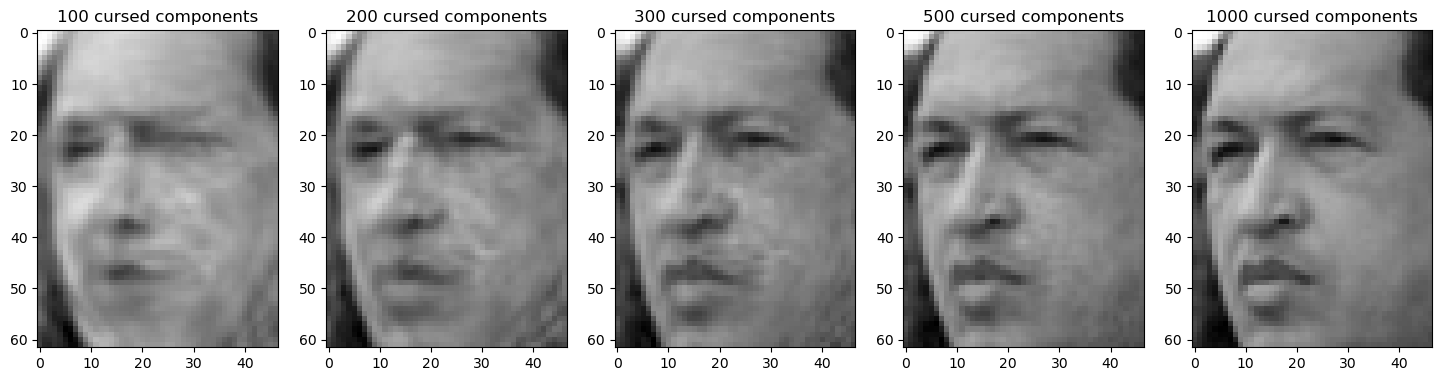

In [31]:
plt.title("Original")
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

dimensions = 100, 200, 300, 500, 1000
fig, axes = plt.subplots(1, len(dimensions), figsize=(18,18))

for ax, dims in zip(axes, dimensions):
    ax.set_title(f"{dims} cursed components")
    Xhat = encode_decode_pca(X, dims)
    ax.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.show()


**ANSWER: As we can see, the more components we add, the better we can recognize our guy. 300 components seems enough to recognize this person on the street, but even at 500 it looks worse than the original.**

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [32]:
def calculate_pca_eigvec_eigval(A, m):
    centered = center_data(A)
    
    eigval, eigvec = compute_eigenvalue_eigenvectors(
        compute_covariance_matrix(centered)
    )
    
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    pca_eigvec = sorted_eigvec[:, :m]  # first 0..m-1 columns
    pca_eigval = sorted_eigval[:m]
    
    return pca_eigvec, pca_eigval

def calculate_number_of_components(eigval, eigvec, proportion):
    """ eigval and eigvec must be sorted """
    
    # this creates an array for each number of dimensions used. should be incremental
    quality_retained = np.cumsum(eigval)/np.sum(eigval)
    
    # keep the lowest one which is above our threshold
    return np.argmax(quality_retained >= proportion)

def encode_decode_pca_with_pov(A, p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected
    
    centered = center_data(A)

    eigvec, eigval = calculate_pca_eigvec_eigval(A, A.shape[1])
    m = calculate_number_of_components(eigval, eigvec, p)
    eigvec = eigvec[:, :m]
    
    P = centered @ eigvec
    
    # re-encode using the given m
    Ahat = P @ eigvec.T
    Ahat += np.mean(A, axis=0)
    
    return Ahat, m

In [33]:
X,y,h,w = syntheticdata.get_lfw_data()

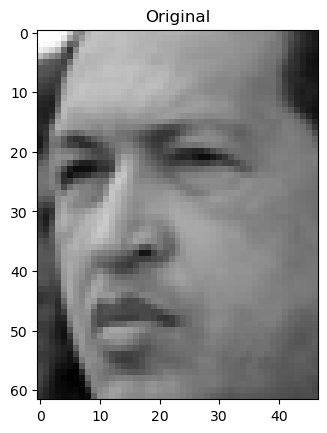

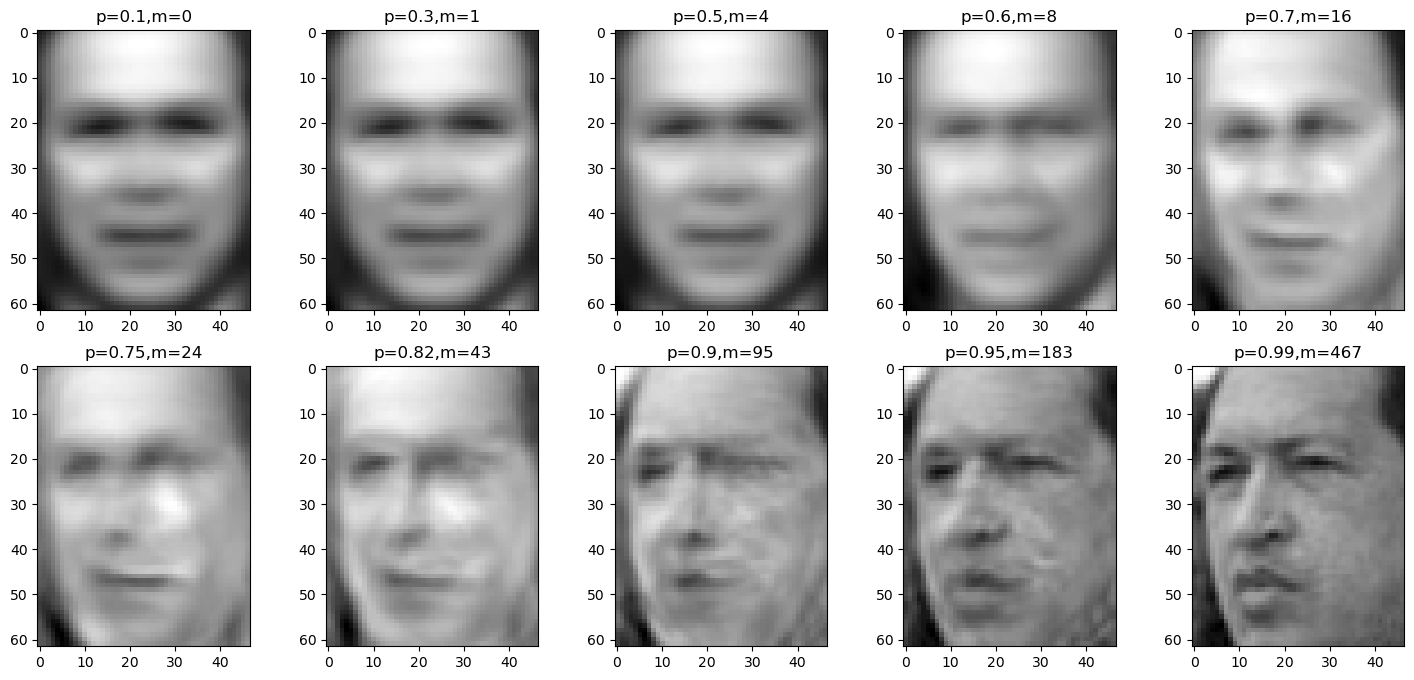

In [34]:
plt.title("Original")
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

proportions = ((0.10, 0.30, 0.5, 0.60, 0.70),
               (0.75, 0.82, 0.9, 0.95, 0.99))
fig, axes = plt.subplots(2, 5, figsize=(18,8))

for i, row in enumerate(proportions):
    for j, p in enumerate(row):
        ax = axes[i,j]
        Xhat, m = encode_decode_pca_with_pov(X, p)
    
        ax.set_title(f"{p=:.3},{m=}")
        ax.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()


**ANSWER: I realize after I did this part that it's for master students only. Oh well. It was fun regardless :)**

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [35]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [36]:
X, y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

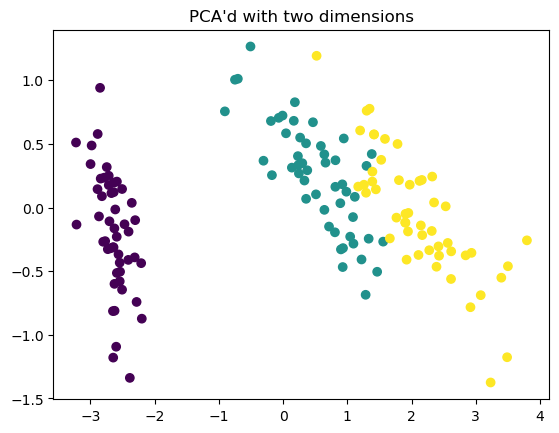

In [37]:
X_centered = center_data(X)
pca_eigvec = calculate_pca_eigvec(X, 2)  # 2 dimensions because sadly because my monitor is just a 2D surface :(
P = X_centered @ pca_eigvec

plt.title("PCA'd with two dimensions")
plt.scatter(P[:,0], P[:,1], c=y, cmap='viridis')

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

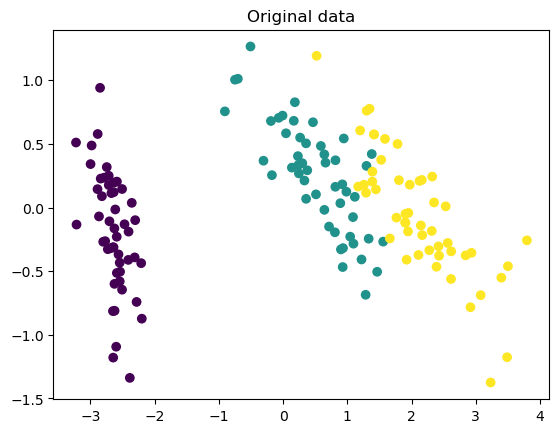

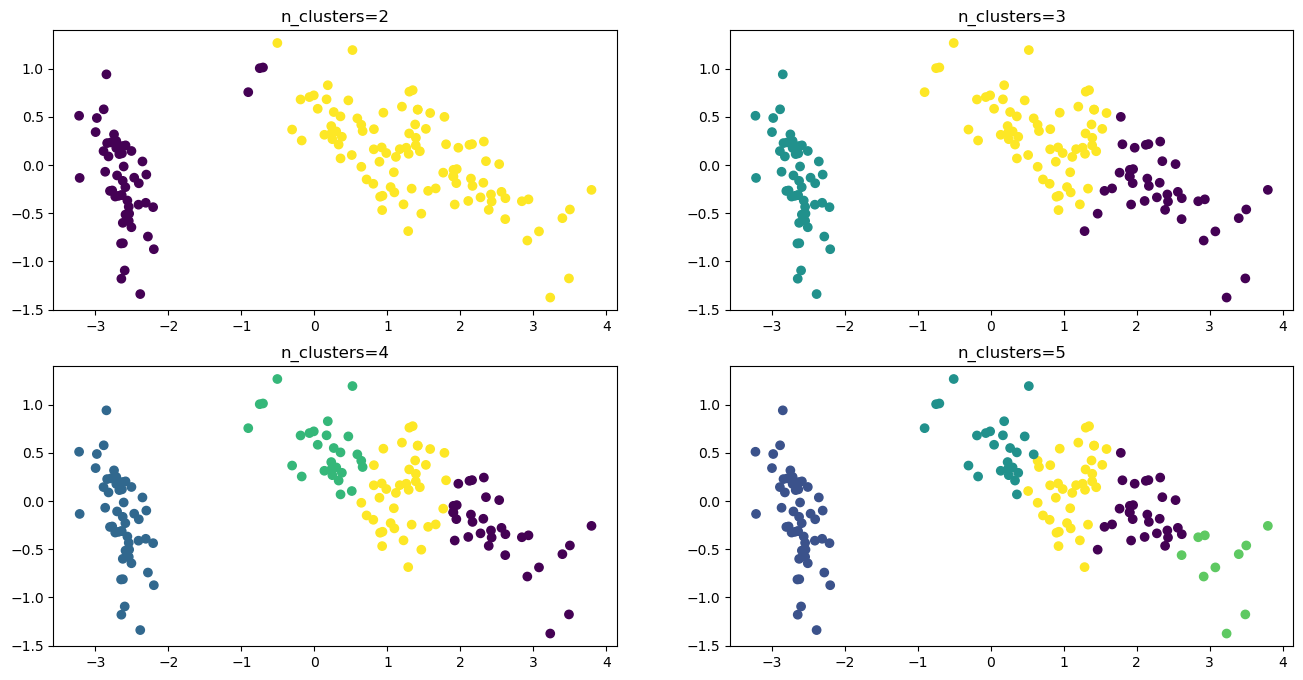

In [38]:
plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')
plt.show()

k_values = 2,3,4,5
fig, axes = plt.subplots(2, len(k_values)//2, figsize=(16, 8))

for ax, k in zip(axes.ravel(), k_values):
    KM = KMeans(n_init=10, n_clusters=k)
    yhat = KM.fit_predict(P)
    
    ax.scatter(P[:,0], P[:,1], c=yhat, cmap='viridis')
    ax.set_title(f"n_clusters={k}")
plt.show()

**ANSWER: We can see that it clearly is able to separate the purple cluster (from the original dataset), albeit some datapoints do appear on the right cluster when `k=2`. This effect disappears when we increase the number of clusters in our analysis.**

**When we set the number of clusters to three, it seems to figure out there's a top/left and a bottom/right side in the cluster, but it does a poor job at separating this data, as the original data is much more diagonal than the predicted ones. This seems to be the case when we increase the clusters beyond the number of datapoints in the original set.**

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

Accuracy using PCA: 0.967
Accuracy using k-means with 2 clusters: 0.667
Accuracy using k-means with 3 clusters: 0.887
Accuracy using k-means with 4 clusters: 0.840
Accuracy using k-means with 5 clusters: 0.907
Accuracy using k-means with 6 clusters: 0.907
Accuracy using k-means with 7 clusters: 0.907
Accuracy using k-means with 8 clusters: 0.967
Accuracy using k-means with 9 clusters: 0.967
Accuracy using k-means with 10 clusters: 0.967


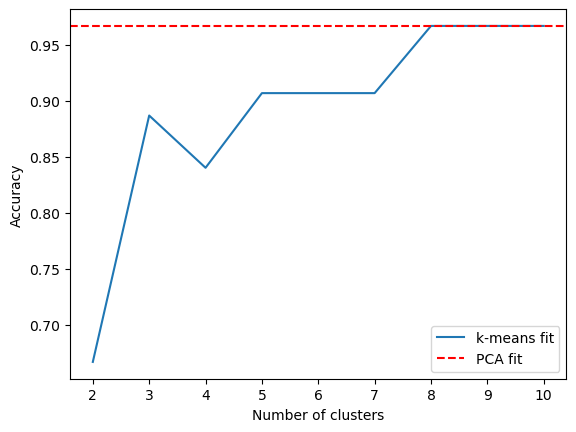

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder  # is this cheating lol

# using PCA
X, y = syntheticdata.get_iris_data()
eigvec = calculate_pca_eigvec(X, 2)
P = center_data(X) @ eigvec

clf = LogisticRegression()
clf.fit(P, y)

prediction = clf.predict(P)
accuracy_pca = metrics.accuracy_score(y, prediction)
print(f"Accuracy using PCA: {accuracy_pca:.3f}")

# using k-means
k_values = 2, 3, 4, 5, 6, 7, 8, 9, 10
accuracies_kmeans = []

for k in k_values:
    KM = KMeans(n_init=10, n_clusters=k)
    yhat = KM.fit_predict(P)

    encoder = OneHotEncoder()
    yhat_encoded = encoder.fit_transform(yhat.reshape(-1,1))
    
    clf = LogisticRegression()
    clf.fit(yhat_encoded, y)
    
    prediction = clf.predict(yhat_encoded)
    acc = metrics.accuracy_score(y, prediction)
    print(f"Accuracy using k-means with {k} clusters: {acc:.3f}")
    accuracies_kmeans.append(acc)

    
plt.plot(k_values, accuracies_kmeans, label="k-means fit")
plt.axhline(accuracy_pca, color="r", linestyle="--", label="PCA fit")
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**ANSWER: I've decided to include up to 10 clusters in the k-means just to see how it looks. I feel we are overfitting our data A LOT due to the reported accuracy of PCA (0.967), with only two components. Either that, or our PCA is just capturing our data extremely well in its two dimensions.**

**It also seems like k-means is kind of useless unless we use an extreme number of clusters. Our original data only has three clusters, which indeed reports the highest accuracy without going beyond a reasonable value for `k`. I don't exactly understand how the mathematics behind k-means works, nor in which cases I should use it instead of PCA, but I would love to know. Regardless, it doesn't seem useful here.**

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 